## Introduction to Deep Learning

<img src="assets/img/AI_Venn.png">

AI in early days were more involved in tasks that are harder for humans but easier for machines such as playing games. Today, deep learning is more about the task that are more intuitive for humans for hard for machine to perform such as analyzing sentiment or recognizing faces.

<blockquote>With regard to computer vision, Moravec estimated that simply matching the edge and motion detection capabilities of human retina in real time would require a general-purpose computer capable of 109 operations/second (1000 MIPS - Million Instructions Per Second).<a href="https://en.wikipedia.org/wiki/History_of_artificial_intelligence#cite_note-80">[1]</a> As of 2011, practical computer vision applications require 10,000 to 1,000,000 MIPS. By comparison, the fastest supercomputer in 1976, Cray-1 (retailing at \$5 million to \$8 million), was only capable of around 80 to 130 MIPS, and a typical desktop computer at the time achieved less than 1 MIPS. <a href="https://en.wikipedia.org/wiki/History_of_artificial_intelligence#cite_note-81">[2]</a></blockquote>

Think about a chess game, there are 64 locations and 32 pieces to move. A computer calculate these moves in advance and set the best strategy. However the tasks that we perform in our daily lives requires incredible amount subjective and intiutive knowledge. Question is how do we program computers to act and perform in a same way as humans do?

One of the first approaches -> Knowledge base approach (hard-coding). 
- Story about a person named Fred shaving in the morning. “FredWhileShaving” contained electrical parts, is Fred still a person?

That led us to a requirement to take things forward. Machines' ability to learn without us programming them explicitly, which is called machine learning. Machine learning algorithms are heavily dependent on the representation. When you are trying to predict customer churn, you need to provide specific information about customers to the algorithm for learning to take place. Pieces of information for each customer are called features and performance depends on how well these features are extracted and fed into the algorithm.

In [4]:
import pandas as pd
df = pd.read_csv('data/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>
<br>
What if we don't know which features to extract? -> Car example, Representation learning (ex. Autoencoders).

Autoencoders are helping us reconstruct the input data and extract features

<img src="https://qph.ec.quoracdn.net/main-qimg-4f7d1edd24357e5606c6da4a8ef9d663.webp">

How autoencoders do that?

<img src="assets/img/autoencoder.png" height=100>

Middle layer in autoencoders is learning a compact representation of data. Like in the previous MNIST example, 28x28 image, which has 784 features when you flatten it can be represented with 25 dimensions in the middle layer.
In other words, its filtering out the noise and learning what's necessary to represent original dataset. Then you can use these representations to feed your machine learning algorithms for training and scoring.

<blockquote>When designing features or algorithms for learning features, our goal is usually
to separate the factors of variation that explain the observed data ... They can be thought of as
concepts or abstractions that help us make sense of the rich variability in the data.
When analyzing a speech recording, the factors of variation include the speaker’s
age, their sex, their accent and the words that they are speaking. When analyzing
an image of a car, the factors of variation include the position of the car, its color,
and the angle and brightness of the sun ... The individual pixels in an image of a red car might be very close
to black at night. The shape of the car’s silhouette depends on the viewing angle.
Most applications require us to disentangle the factors of variation and discard the
ones that we do not care about.

Of course, it can be very difficult to extract such high-level, abstract features
from raw data. Many of these factors of variation, such as a speaker’s accent,
can be identified only using sophisticated, nearly human-level understanding of
the data. When it is nearly as difficult to obtain a representation as to solve the
original problem, representation learning does not, at first glance, seem to help us. [[3]](http://www.deeplearningbook.org/)</blockquote>

That brings us to deep learning!

<img src="assets/img/deep_learning_model.png">

## Parts of AI

<img src="assets/img/Parts_of_AI.png">

## Gradient descent

In [ ]:
import random

def f(x):
    """
    Quadratic function.
    """
    return x**2 + 5

In [ ]:
def df(x):
    """
    Derivative of `f` with respect to `x`.
    """
    return 2*x

In [ ]:
def gradient_descent_update(x, gradx, learning_rate):
    """
    Performs a gradient descent update.
    """
    x = x - (gradx * learning_rate)
    
    # Return the new value for x
    return x

In [ ]:
x = random.randint(0, 10000)
learning_rate = 0.1
epochs = 100

for i in range(epochs+1):
    cost = f(x)
    gradx = df(x)
    print("EPOCH {}: Cost = {:.3f}, x = {:.3f}".format(i, cost, gradx))
    x = gradient_descent_update(x, gradx, learning_rate)

Nice, slow learning rate, good lad!

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840d0aa_gradient-descent-convergence/gradient-descent-convergence.gif">

High learning rate, bad lad!

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840d077_gradient-descent-divergence/gradient-descent-divergence.gif">

#### Linear function

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

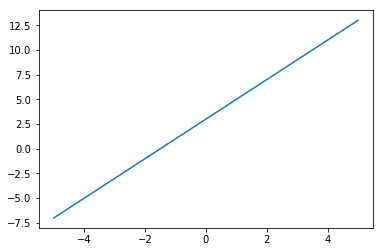

In [3]:
x = np.linspace(-5,5,num=100)
y = 2*x + 3

plt.plot(x,y)
plt.show()

In [5]:
def f(w,b):
    """
    We will limit ourselves to a linear function
    """
    return w*x+b

def loss_function(w,b):
    """
    Loss function (squared error)
    Note that w and b are the ONLY variables
    """
    e = y - f(w,b)
    return np.mean(np.square(e))

In [6]:
loss_function(2,3)

0.0

In [7]:
loss_function(2,4)

1.0

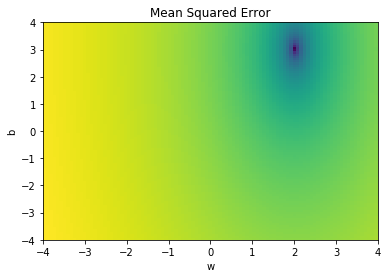

In [8]:
w_try = np.linspace(-4,4,num=100)
b_try = np.linspace(-4,4,num=100)

w_try, b_try = np.meshgrid(w_try,b_try)
e_obs = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        e_obs[i,j] = loss_function(w_try[i,j],b_try[i,j])
        
plt.pcolormesh(w_try, b_try, np.log(e_obs)) #using log here helps visualise better, you may take it out
plt.xlabel('w')
plt.ylabel('b')
plt.title('Mean Squared Error')
plt.show()   

In [9]:
e_obs.max()

355.060606060606

In [10]:
e_obs.min()

0.0043879944910451526

#### Sklearn LinearRegression

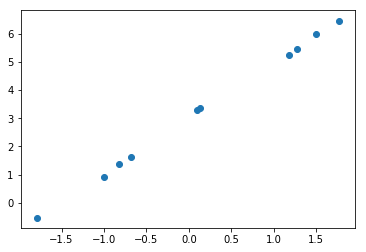

In [11]:
x = np.random.randn(10,1)
y = 2*x+3 + 0.1*np.random.randn(10,1)

plt.scatter(x,y)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_

array([[1.97101346]])

In [14]:
model.intercept_

array([2.99219157])

In [15]:
model.predict(20) # 2*20+3

array([[42.41246074]])

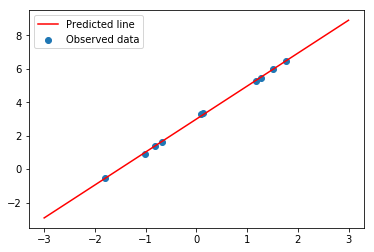

In [16]:
x_test = np.linspace(-3,3)
y_pred = model.predict(x_test[:,None])

plt.scatter(x,y)
plt.plot(x_test,y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

\begin{align}
y = b +w^T X \\
X = [x\quad x^2\quad x^3] \\
y = b +wx +w_2 x^2 +w_3 x^3 \\
\end{align}
The shapes of the matrices are:
- X = NxD matrix
- y = Nx1 vector
- w = Dx1 vector

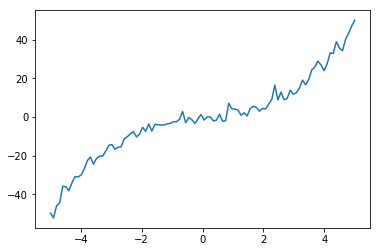

In [17]:
x = np.linspace(-5,5,num=100)[:,None]
y = -0.5 + 2.2*x + 0.3*x**3 + 2*np.random.randn(100,1)

plt.plot(x,y)
plt.show()

In [18]:
x.shape

(100, 1)

In [19]:
x_new = np.hstack([x,x**2,x**3,x**4])
x_new.shape

(100, 4)

In [20]:
x.shape

(100, 1)

In [21]:
model = LinearRegression()
model.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
model.coef_

array([[ 2.11296545e+00,  2.33369211e-02,  3.11652956e-01,
        -1.45314178e-03]])

In [23]:
model.intercept_

array([-0.65869343])

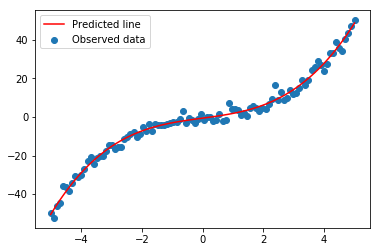

In [24]:
y_pred = model.predict(x_new)

plt.scatter(x,y)
plt.plot(x_new[:,0],y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
x_new2 = poly.fit_transform(x)
x_new2[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])

## Regularization

Loss function with a penalty function to discourage large values of $w$.

\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i|w,b))^2 + \alpha \sum_{j=1}^D w_j^2 + \beta \sum_{j=1}^D |w_j|
\end{align}
where, $f(x_i|w,b) = wx_i+b$. The values of $\alpha$ and $\beta$ are positive (or zero), with higher values enforcing the weights to be closer to zero.

In [3]:
# In order to reproduce the exact same number we need to set the seed for random number generators:
np.random.seed(1)

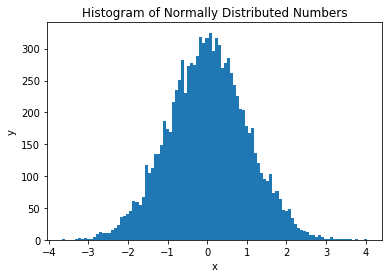

In [27]:
e = np.random.randn(10000,1)
plt.hist(e,100) #histogram with 100 bins
plt.ylabel('y')
plt.xlabel('x')
plt.title('Histogram of Normally Distributed Numbers')
plt.show()

In [28]:
# Generate the data
N = 40 # Number of observations
D = 100 # Dimensionality

x = np.random.randn(N,D) # get random observations of x
w_true = np.zeros((D,1)) # create a weight vector of zeros
idx = np.random.choice(100,10,replace=False) # randomly choose 10 of those weights
w_true[idx] = np.random.randn(10,1) # populate then with 10 random weights

e = np.random.randn(N,1) # have a noise vector
y = np.matmul(x,w_true) + e # generate observations

# create validation set:
N_test = 50
x_test = np.random.randn(50,D)
y_test_true = np.matmul(x_test,w_true)

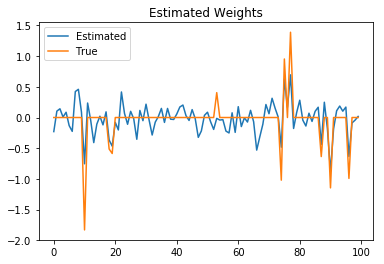

In [29]:
model = LinearRegression()
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.title('Estimated Weights')
plt.show()

One way of testing how good your model is to look at metrics. In the case of regression Mean Squared Error (MSE) is a common metric which is defined as:
$$ \frac{1}{N}\sum_{i=1}^N \xi_i^2$$ where, $\xi_i = y_i-f(x_i|w,b)$. Furthermore it is best to look at the MSE on a validation set, rather than on the training dataset that we used to train the model.

In [30]:
y_est = model.predict(x_test)
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

6.794999549506439


Ridge regression is where you penalise the weights by setting the $\alpha$ parameter right at the top. It penalises it so that the higher **the square of the weights** the higher the loss.

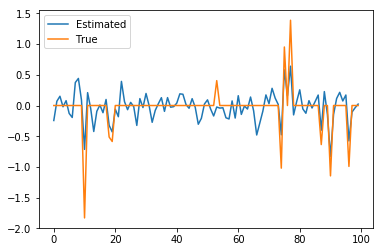

In [31]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=5.0,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

In [32]:
y_est = model.predict(x_test)
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

6.422880725012181


Lasso is a model that encourages weights to go to zero exactly, as opposed to Ridge regression which encourages small weights.

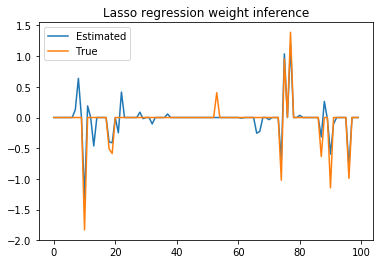

In [33]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.title('Lasso regression weight inference')
plt.show()

In [34]:
y_est = model.predict(x_test)[:,None]
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

2.3060013408424545


Automated Relevance Determination (ARD) regression is similar to lasso in that it encourages zero weights. However, the advantage is that you do not need to set a penalisation parameter, $\alpha$, $\beta$ in this model.

/root/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


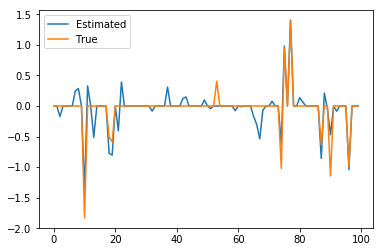

In [35]:
from sklearn.linear_model import ARDRegression

model = ARDRegression(fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

In [39]:
y_est = model.predict(x_test)[:,None]
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

2.8701672081785663


#### Solve Linear Model w/ Gradient Descent

In [4]:
np.random.seed(1)

In [41]:
N = 100
x = np.random.rand(N,1)*5
# Let the following command be the true function
y = 2.3 + 5.1*x
# Get some noisy observations
y_obs = y + 2*np.random.randn(N,1)

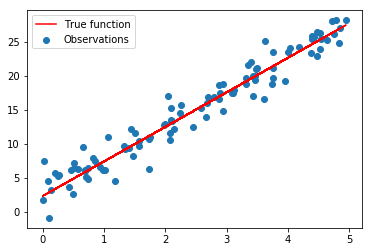

In [42]:
plt.scatter(x,y_obs,label='Observations')
plt.plot(x,y,c='r',label='True function')
plt.legend()
plt.show()

We are trying to minimise $\sum \xi_i^2$.

\begin{align}
\mathcal{L} & = \frac{1}{N}\sum_{i=1}^N (y_i-f(x_i,w,b))^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = -\frac{1}{N}\sum_{i=1}^N 2(y_i-f(x_i,w,b))\frac{\delta f(x_i,w,b)}{\delta w} \\ 
& = -\frac{1}{N}\sum_{i=1}^N 2\xi_i\frac{\delta f(x_i,w,b)}{\delta w}
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$ and 
$$
\frac{\delta f(x_i,w,b)}{\delta w} = x_i
$$

Similar expression can be found for $\frac{\delta\mathcal{L}}{\delta b}$ (exercise).

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [43]:
# Helper functions
def f(w,b):
    return w*x+b

def loss_function(e):
    L = np.sum(np.square(e))/N
    return L

def dL_dw(e,w,b):
    return -2*np.sum(e*df_dw(w,b))/N

def df_dw(w,b):
    return x

def dL_db(e,w,b):
    return -2*np.sum(e*df_db(w,b))/N

def df_db(w,b):
    return np.ones(x.shape)

In [44]:
# The Actual Gradient Descent
def gradient_descent(iter=100,gamma=0.1):
    # get starting conditions
    w = 10*np.random.randn()
    b = 10*np.random.randn()
    
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
        params.append([w,b])
        e = y_obs - f(w,b) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        w_new = w - gamma*dL_dw(e,w,b)
        b_new = b - gamma*dL_db(e,w,b)
        w = w_new
        b = b_new
        
    return params, loss
        
params, loss = gradient_descent()

In [45]:
iter=100
gamma = 0.1
w = 10*np.random.randn()
b = 10*np.random.randn()

params = []
loss = np.zeros((iter,1))
for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
    params.append([w,b])
    e = y_obs - f(w,b) # Really important that you use y_obs and not y (you do not have access to true y)
    loss[i] = loss_function(e)

    #update parameters
    w_new = w - gamma*dL_dw(e,w,b)
    b_new = b - gamma*dL_db(e,w,b)
    w = w_new
    b = b_new

In [46]:
dL_dw(e,w,b)

0.007829640537794828

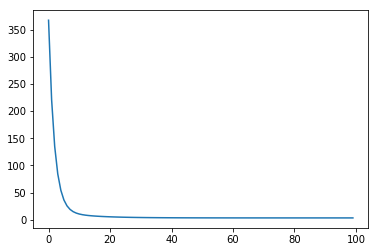

In [47]:
plt.plot(loss)

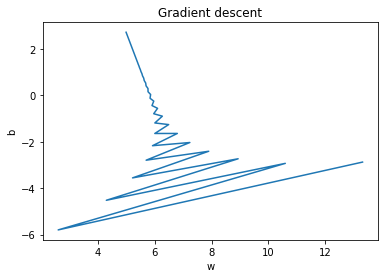

In [48]:
params = np.array(params)
plt.plot(params[:,0],params[:,1])
plt.title('Gradient descent')
plt.xlabel('w')
plt.ylabel('b')
plt.show()

In [49]:
params[-1]

array([4.98991104, 2.72258102])

## Multivariate case

We are trying to minimise $\sum \xi_i^2$. This time $ f = Xw$ where $w$ is Dx1 and $X$ is NxD.

\begin{align}
\mathcal{L} & = \frac{1}{N} (y-Xw)^T(y-Xw) \\
\frac{\delta\mathcal{L}}{\delta w} & = -\frac{1}{N} 2\left(\frac{\delta f(X,w)}{\delta w}\right)^T(y-Xw) \\ 
& = -\frac{2}{N} \left(\frac{\delta f(X,w)}{\delta w}\right)^T\xi
\end{align}
where $\xi_i$ is the error term $y_i-f(X,w)$ and 
$$
\frac{\delta f(X,w)}{\delta w} = X
$$

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [50]:
N = 1000
D = 5
X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)
y_obs = y + np.random.randn(N,1)

In [51]:
w

array([[ 0.93774813],
       [-2.62540124],
       [ 0.74616483],
       [ 0.67411002],
       [ 1.0142675 ]])

In [52]:
X.shape

(1000, 5)

In [53]:
w.shape

(5, 1)

In [54]:
(X*w.T).shape

(1000, 5)

In [55]:
# Helper functions
def f(w):
    return X.dot(w)

def loss_function(e):
    L = e.T.dot(e)/N
    return L

def dL_dw(e,w):
    return -2*X.T.dot(e)/N 

In [56]:
def gradient_descent(iter=100,gamma=1e-3):
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
        params.append(w)
        e = y_obs - f(w) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        w = w - gamma*dL_dw(e,w)
        
    return params, loss
        
params, loss = gradient_descent()

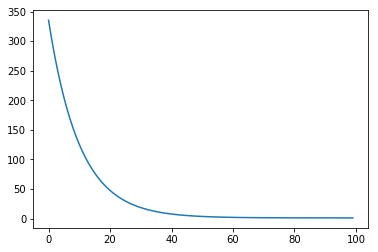

In [57]:
plt.plot(loss)

In [58]:
params[-1]

array([[ 0.94792987],
       [-2.60989696],
       [ 0.72929842],
       [ 0.65272494],
       [ 1.01038855]])

In [59]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
model.coef_.T

array([[ 0.93774813],
       [-2.62540124],
       [ 0.74616483],
       [ 0.67411002],
       [ 1.0142675 ]])

In [60]:
# compare parameters side by side
np.hstack([params[-1],model.coef_.T])

array([[ 0.94792987,  0.93774813],
       [-2.60989696, -2.62540124],
       [ 0.72929842,  0.74616483],
       [ 0.65272494,  0.67411002],
       [ 1.01038855,  1.0142675 ]])

## Stochastic Gradient Descent

In [61]:
def dL_dw(X,e,w):
    return -2*X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-3, n_epochs=100, batch_size=20, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            e = y_obs[idx] - X[idx].dot(w) # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,w)
        loss[i] = e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

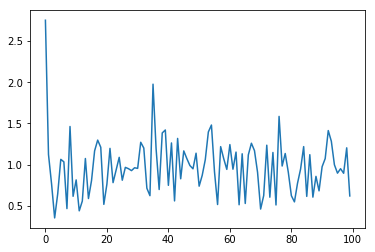

In [62]:
plt.plot(loss)

In [63]:
np.hstack([params[-1],model.coef_.T])

array([[ 0.94494132,  0.93774813],
       [-2.6276984 , -2.62540124],
       [ 0.74654537,  0.74616483],
       [ 0.66766209,  0.67411002],
       [ 1.00760747,  1.0142675 ]])

## Backpropagation on zero hidden layer classification case
Suppose we are required to learn the function that maps $x$ (the inputs) to $y$ (the outputs). In this particular instance we restrict ourselves to the case that $y=\sigma(Wx)$. The maths behind regression is shown below:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
where $\sigma(z_i) = 1/(1+exp(-z_i))$ is the sigmoid function. $a_i$ is commonly known as the activation. **The loss function** is $$\mathcal{L} = \frac{1}{2N}\sum_i (y_i-a_i)^2$$. 

**We need to adjust the $W$ to minimise the loss function**. We use the chain rule:
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot a_i(1-a_i)\cdot x_i
\end{align}

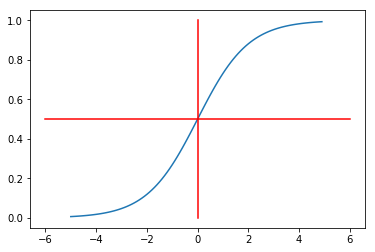

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-5,5,0.1)

plt.plot(z,sigmoid(z))
plt.plot([0,0],[0,1],'r')
plt.plot([-6,6],[0.5,0.5],'r')

In [11]:
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)

y[y<=0] = 0 
y[y>0] = 1

In [12]:
train_X = X[1:100]
test_X = X[100:]

In [13]:
X.shape

(1000, 5)

In [14]:
train_X.shape

(99, 5)

In [15]:
test_X.shape

(900, 5)

In [16]:
def dL_dw(X,e,a):
    return -X.T.dot(e*a*(1-a))/len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,a)
        loss[i] = 0.5*e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

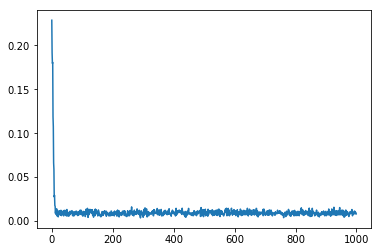

In [17]:
plt.plot(loss)

In [18]:
np.hstack([params[-1],w])

array([[ 1.23797106,  2.06563568],
       [ 0.5054685 ,  0.80398733],
       [-0.51911579, -0.88059464],
       [ 0.97552653,  1.6716524 ],
       [ 0.38909335,  0.67572941]])

In [21]:
idx = np.random.choice(len(X),20,replace=False)

In [19]:
idx = np.random.choice(len(X),20,replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
0.5*e.T.dot(e)/len(e)

array([[0.0007286]])

In [20]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

99

## Cross Entropy Error

We shall focus on doing the same as above with a different loss function, the Cross Entropy Loss function.
$$\mathcal{L} = -\frac{1}{N}\sum_i y_i\log(a_i)+(1-y_i)\log(1-a_i)$$.

The following remains the same:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
and the derivative,
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i-a_i}{a_i(1-a_i)}\right)\cdot a_i(1-a_i)\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot x_i
\end{align}

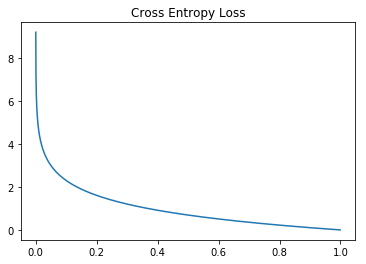

In [117]:
y = 1.0
def loss(p,y):
    l = -(y*np.log(p)+(1-y)*np.log(1-p))
    return l

p = np.arange(1e-4,0.999,1e-4)

l = loss(p,y)
plt.plot(p,l)
plt.title('Cross Entropy Loss')
plt.show()

In [94]:
def dL_dw(X,e,a):
    return -X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-2, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    # NOTE: I initialised w such that its variance is 1/D
    w = np.random.randn(D,1)*(1/np.sqrt(D))
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)  
            w = w - gamma*dL_dw(X[idx],e,a)
#         
        loss[i] = -np.mean(y[idx]*np.log(a+1e-10)+(1-y[idx])*np.log(1-a+1e-10))
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

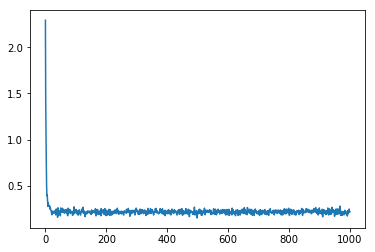

In [95]:
plt.plot(loss)

In [96]:
np.hstack([params[-1],w])

array([[-0.34100149, -0.81100387],
       [ 0.17795203,  0.55550742],
       [ 0.20981931,  0.6490058 ],
       [-0.32109122, -0.94507885],
       [-0.02040261, -0.06170704]])

In [97]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

94

## Tensorflow Introduction

In [98]:
import tensorflow as tf

In [99]:
X.shape

(1000, 5)

In [104]:
def tf_train(X_train, y_train, batch_size=20, n_epoch=1000):
    x = tf.placeholder(tf.float32, [None, D])
    y_ = tf.placeholder(tf.float32, [None, 1])
    
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))

    # Define loss and optimizer
    z = tf.matmul(x,W)

    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y_))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(n_epoch):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
            
    return sess.run(W)

In [105]:
w_est = tf_train(X,y)

loss: 2.6870666
loss: 0.19449328
loss: 0.14020291
loss: 0.08766681
loss: 0.14936483
loss: 0.15207599
loss: 0.061406862
loss: 0.08521197
loss: 0.045081034
loss: 0.026606679


In [106]:
np.hstack([w_est,w])

array([[-0.87313759, -0.81100387],
       [ 0.52749461,  0.55550742],
       [ 0.64282984,  0.6490058 ],
       [-0.93147761, -0.94507885],
       [-0.0679407 , -0.06170704]])

In [107]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(w_est)) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

100

# Deep Learning - Hidden Layers

In [118]:
mnist = input_data.read_data_sets('./', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [119]:
x, y = mnist.train.next_batch(20)

In [120]:
x.shape

(20, 784)

In [121]:
28*28

784

In [122]:
y.shape

(20, 10)

In [123]:
y

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

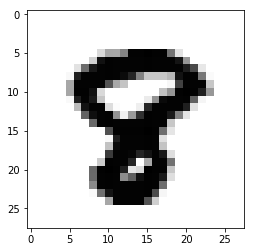

In [124]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

In [125]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b

y_true = tf.placeholder(tf.float32,[None, 10])

#   tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0:
        print('loss: '+str(l))

loss: 2.302585
loss: 0.45553857
loss: 0.38547936
loss: 0.34017777
loss: 0.3632879
loss: 0.3109821
loss: 0.2902648
loss: 0.21802849
loss: 0.3071084
loss: 0.35825592


Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [127]:
# test the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9158


In [128]:
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_true: mnist.train.labels}))

0.91407275


In [129]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.302585 accuracy: 0.1015625
10: loss: 0.8203729 accuracy: 0.75
20: loss: 0.5916223 accuracy: 0.8125
30: loss: 0.5991503 accuracy: 0.859375
40: loss: 0.5446749 accuracy: 0.859375
50: loss: 0.5402509 accuracy: 0.8203125
60: loss: 0.517534 accuracy: 0.8203125
70: loss: 0.451462 accuracy: 0.875
80: loss: 0.5820608 accuracy: 0.8125
90: loss: 0.2884728 accuracy: 0.9453125
100: loss: 0.38508928 accuracy: 0.8828125
200: loss: 0.36336017 accuracy: 0.90625
300: loss: 0.27913833 accuracy: 0.8984375
400: loss: 0.3539064 accuracy: 0.890625
500: loss: 0.35860908 accuracy: 0.890625
600: loss: 0.31075776 accuracy: 0.9140625
700: loss: 0.21531336 accuracy: 0.9375
800: loss: 0.23248166 accuracy: 0.9296875
900: loss: 0.15413819 accuracy: 0.9609375


## Hidden Layered Network

In [130]:
def fully_conntected_activation(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.nn.relu(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.matmul(input,W)+b
    
    return activation

In [131]:
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32,[None, 10])

hidden = fully_conntected_activation(x,784,100)
output = fully_conntected(hidden,100,10)
# output = fully_conntected(x,784,10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# test the model
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                     feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.3524566 accuracy: 0.125
10: loss: 1.1329682 accuracy: 0.6640625
20: loss: 0.80445814 accuracy: 0.765625
30: loss: 0.64071023 accuracy: 0.796875
40: loss: 0.7000135 accuracy: 0.78125
50: loss: 0.38330975 accuracy: 0.8828125
60: loss: 0.35789657 accuracy: 0.90625
70: loss: 0.43315253 accuracy: 0.8984375
80: loss: 0.33829698 accuracy: 0.875
90: loss: 0.43556786 accuracy: 0.8671875
100: loss: 0.47227454 accuracy: 0.8984375
200: loss: 0.2077807 accuracy: 0.921875
300: loss: 0.28124374 accuracy: 0.9375
400: loss: 0.14851634 accuracy: 0.953125
500: loss: 0.13532352 accuracy: 0.9609375
600: loss: 0.11966783 accuracy: 0.9765625
700: loss: 0.09015067 accuracy: 0.9609375
800: loss: 0.15146054 accuracy: 0.9609375
900: loss: 0.07779639 accuracy: 0.96875


In [132]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9675


## Keras

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

mnist = input_data.read_data_sets('./')

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [159]:
x, y = mnist.train.next_batch(20)
num_pixels = x.shape[1]
width = 28
height = 28

In [160]:
x.shape

(20, 784)

In [161]:
28*28

784

In [162]:
y.shape

(20,)

In [163]:
y

array([5, 7, 1, 2, 1, 2, 7, 5, 1, 1, 2, 9, 2, 2, 3, 8, 2, 0, 2, 3],
      dtype=uint8)

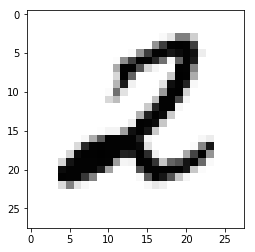

In [167]:
plt.imshow(x[3].reshape((28,28)),cmap='Greys')
plt.show()

## Basic logistic multiclass classification:

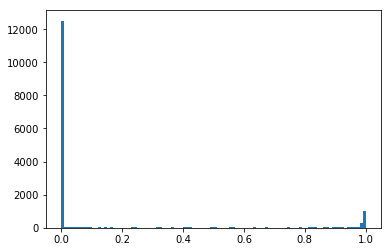

In [168]:
plt.hist(x.ravel(),100)
plt.show()

In [169]:
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(1000)

In [170]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
y_pred = logistic.predict(x_test)
y_pred[:10]

array([9, 2, 7, 6, 7, 5, 9, 3, 1, 7], dtype=uint8)

In [172]:
logistic.predict_proba(x_test[:3])

array([[6.18930282e-04, 8.83533632e-02, 3.80101877e-03, 4.57914271e-04,
        1.47787437e-01, 6.41217876e-03, 1.75212036e-03, 1.54528890e-01,
        4.08466117e-03, 5.92203486e-01],
       [1.04939528e-03, 3.73831179e-08, 9.95321199e-01, 4.55215934e-04,
        2.56409284e-06, 7.92874301e-09, 1.07208348e-04, 5.38559157e-07,
        3.05316945e-03, 1.06643540e-05],
       [6.16331376e-04, 7.54601338e-07, 1.69649304e-02, 5.14410892e-02,
        2.20818130e-04, 1.11199721e-04, 6.55229497e-05, 9.22599367e-01,
        5.59935331e-03, 2.38063353e-03]])

In [173]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.892

## Keras Multilayered Perceptron (Neural Net)

In [174]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

### Zero hidden layers

It is important to note that when we do classification problems we use the **Categorical Crossentropy Loss**. When its only two classes we can use Logistic Loss (Binary Crossentropy Loss). Finally for regression problems we use **Mean Squared Error**.

The Cross Entropy loss is defined as:
$$\mathcal{L} = -\frac{1}{N}\sum_i \mathcal{I}(y_i=1)\log(p_{i1})+\mathcal{I}(y_i=2)\log(1-p_{i2})+\cdots++\mathcal{I}(y_i=K)\log(1-p_{iK})$$
where $N$ is the number of training instances, $K$ is the number of classes and $p_{ik}$ is the probability that instance $i$ belongs to $k$.

Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [175]:
model = Sequential()
model.add(Dense(units=10, input_dim=num_pixels, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [176]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s 3ms/step - loss: 0.8445


In [177]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

array([9, 2, 7, 6, 7, 5, 9, 2, 1, 7])

In [178]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.9

### 1 Hidden Layer

In [179]:
model = Sequential()
model.add(Dense(units=50, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [180]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s 5ms/step - loss: 0.5455


In [181]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

0.929

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [183]:
784 * 50 + 50

39250

## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

In [186]:
# Need to reshape the x values to a 28x28 image
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [187]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [188]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [189]:
28 * 28 * 32

25088

In [190]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 12s 57ms/step - loss: 0.3855


In [191]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.96

### Using the max pooling layer:

In [192]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [194]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 14s 66ms/step - loss: 0.4606


In [195]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.946

## Multi Layer Convolutional Network:

In [197]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [198]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
__________

In [199]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 37s 172ms/step - loss: 0.4600


In [200]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

0.974